In [1]:
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt

import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

**Login

In [2]:
username = "jeroendereu"
password = "***"

In [3]:
api = SentinelAPI(username, password, "https://scihub.copernicus.eu/dhus")

**Download Sentinelsat data

In [4]:
# example
# product_id_example = "36871bc0-b115-4dd8-9830-392619fc9e25"

In [5]:
# download single scene by known product id
# api.download(product_id_example)

In [6]:
# Get basic information about the product: its title, file size, MD5 sum, date, footprint and its download url
# api.get_product_odata(product_id_example)

In [7]:
# Get the product's full metadata available on the server
# api.get_product_odata(product_id_example, full=True)

**DOWNLOAD the DATA in BULK

define footprint

In [8]:
# define footprint = search the data by polygon
footprint_flanders_geojson = geojson_to_wkt(read_geojson("C:/WERKMAP/Anaconda/sentinelsat/geojson/footprint_flanders_geojson.geojson"))

In [9]:
footprint_flanders_geojson

'POLYGON ((2.5406630 50.6879597, 2.5406630 51.5056400, 5.9098982 51.5056400, 5.9098982 50.6879597, 2.5406630 50.6879597))'

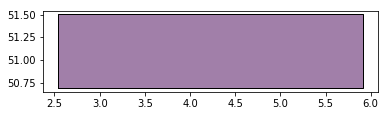

In [10]:
plot_geojson = gpd.read_file("C:/WERKMAP/Anaconda/sentinelsat/geojson/footprint_flanders_geojson.geojson")
plot_geojson.plot()

set parameters

In [11]:
# set parameters
startdate = '20160701'
enddate = '20160731'
platform = 'Sentinel-2'
min_cloud = '0'
max_cloud = '30'

In [13]:
# query the data by footprint, time, and keywords
products = api.query(footprint_flanders_geojson, 
                     startdate, 
                     enddate, 
                     platformname = platform, 
                     cloudcoverpercentage = '[' + min_cloud + ' TO ' + max_cloud + ']'
                    )

In [14]:
# queried data is stored in dictionary
products

OrderedDict([('d7a0b997-c292-4d5c-b7ba-5ca8af81de9e',
              {'beginposition': datetime.datetime(2016, 7, 20, 10, 55, 47),
               'cloudcoverpercentage': 4.0373875,
               'endposition': datetime.datetime(2016, 7, 20, 10, 55, 47),
               'filename': 'S2A_OPER_PRD_MSIL1C_PDMC_20160805T152827_R051_V20160720T105547_20160720T105547.SAFE',
               'footprint': 'POLYGON ((1.468686704722542 54.138365533797554,1.5024787799297383 53.19487890749161,1.532978599279183 52.296322681530654,1.563305120541532 51.354432348394134,3.069950651279659 51.362769188761256,4.506317268777333 51.35310616658424,5.940730468616287 51.325862789277174,7.442095184333064 51.27892518278613,7.449316928500434 51.35153861060136,7.704578464673325 51.35607984388353,7.678476610135315 52.255149533971945,7.678544065009484 52.25515074878083,7.677231805547748 52.29802641358729,7.675924550313965 52.34305438492137,7.675853711339602 52.343053107669625,7.6510762392320775 53.15261144564422,9.145975

In [15]:
# download all datasets (from query)
api.download_all(products)

Downloading: 100%|██████████████████████| 6.56G/6.56G [1:09:17<00:00, 1.80MB/s]
Downloading: 100%|█████████████████████████| 6.17G/6.17G [45:08<00:00, 825KB/s]
Downloading: 100%|████████████████████████| 6.86G/6.86G [45:18<00:00, 3.29MB/s]
Downloading: 100%|████████████████████████| 7.52G/7.52G [51:46<00:00, 2.45MB/s]
Downloading: 100%|████████████████████████| 7.40G/7.40G [50:09<00:00, 2.78MB/s]


(OrderedDict([('d7a0b997-c292-4d5c-b7ba-5ca8af81de9e',
               {'date': datetime.datetime(2016, 7, 20, 10, 55, 47),
                'downloaded_bytes': 6562286061,
                'footprint': 'POLYGON((1.468686704722542 54.138365533797554,1.5024787799297383 53.19487890749161,1.532978599279183 52.296322681530654,1.563305120541532 51.354432348394134,3.069950651279659 51.362769188761256,4.506317268777333 51.35310616658424,5.940730468616287 51.325862789277174,7.442095184333064 51.27892518278613,7.449316928500434 51.35153861060136,7.704578464673325 51.35607984388353,7.678476610135315 52.255149533971945,7.678544065009484 52.25515074878083,7.677231805547748 52.29802641358729,7.675924550313965 52.34305438492137,7.675853711339602 52.343053107669625,7.6510762392320775 53.15261144564422,9.145975990507251 53.161084098264766,9.149425629181234 54.14801139115367,7.619287624914551 54.139229841140434,7.619256720590609 54.140186775460364,7.543978007824918 54.13879763491648,7.468686704722542 54.1

In [ ]:
# GeoJSON FeatureCollection containing footprints and metadata of the scenes
geojson_products = api.to_geojson(products)

In [ ]:
geojson_products

In [ ]:
# GeoPandas GeoDataFrame with the metadata of the scenes and the footprints as geometries
api.to_geodataframe(products)